In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import lenet_mnist

branchyNet = lenet_mnist.get_network()
branchyNet.to_gpu()
branchyNet.training()

Import Data

In [4]:
from datasets import mnist
x_train, y_train, x_test, y_test = mnist.get_data()

Settings

In [5]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [6]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

Train BranchyNet

In [7]:
TRAIN_NUM_EPOCHS = 100
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

Visualizing Network Training

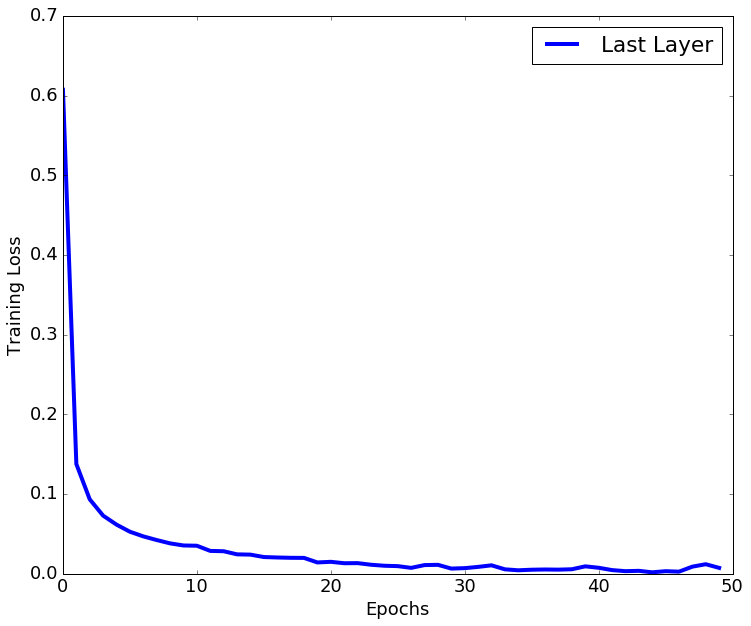

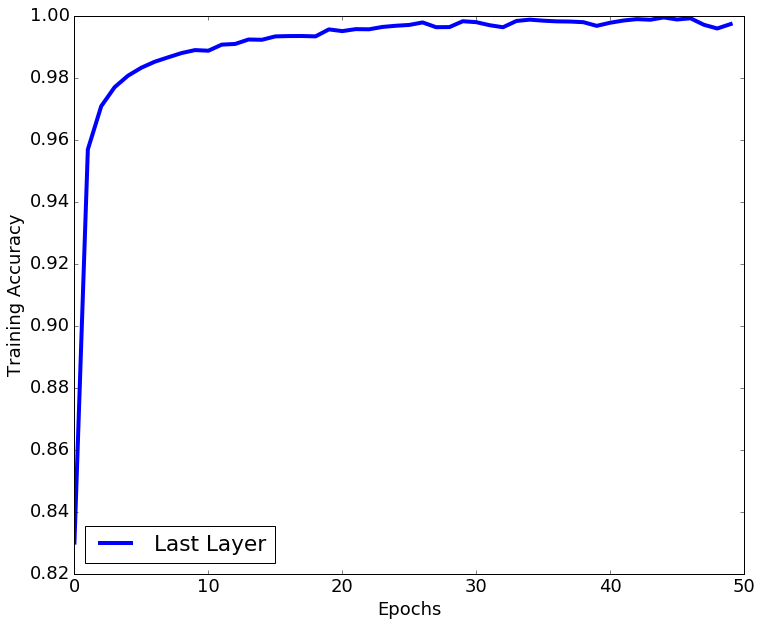

In [8]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

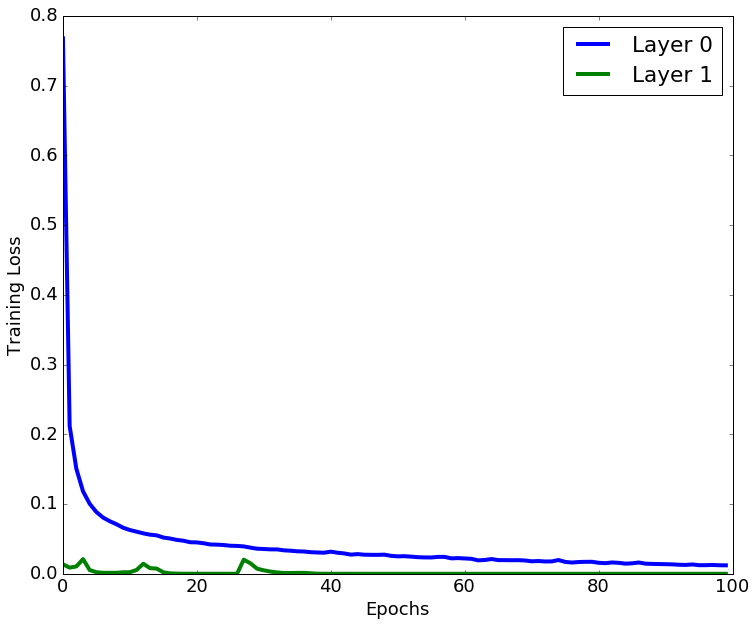

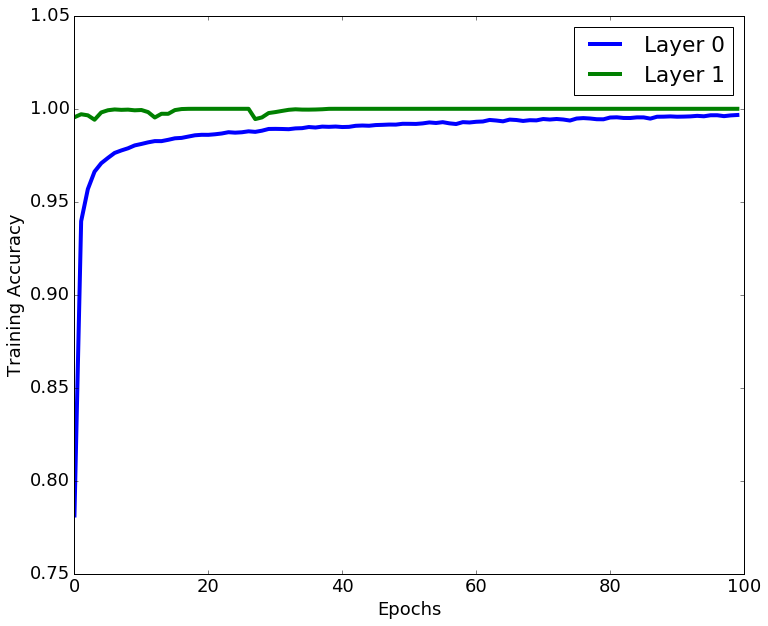

In [9]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Get exit result, compute openmax vs softmax

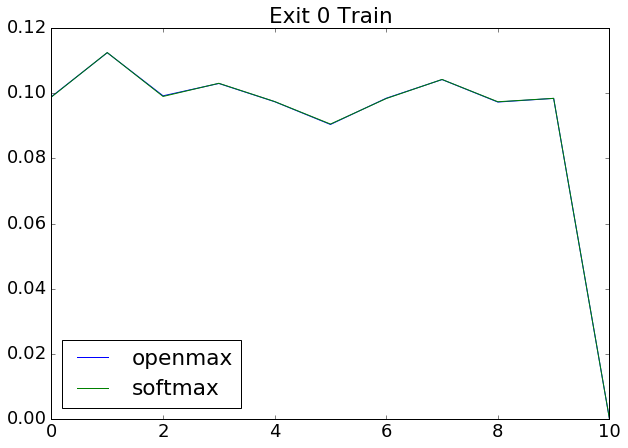

[  9.89652014e-02   1.12478899e-01   9.92315606e-02   1.03015684e-01
   9.74234611e-02   9.04245936e-02   9.84876130e-02   1.04221996e-01
   9.73125897e-02   9.84383476e-02   5.46420397e-08]
[ 0.09887116  0.11251414  0.09903018  0.10307552  0.09747085  0.09054905
  0.09838968  0.10425042  0.09739985  0.09844915  0.        ]


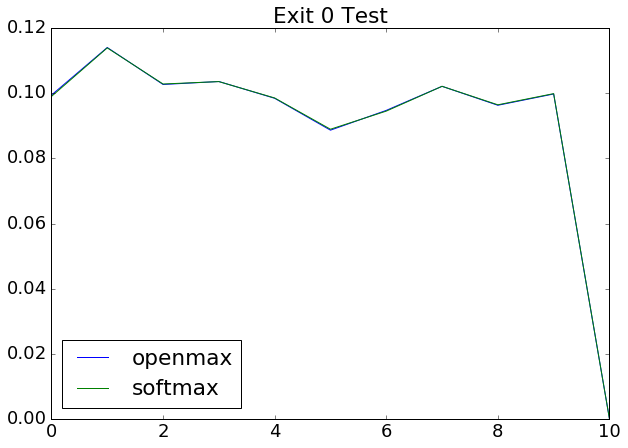

[  9.94466419e-02   1.14069472e-01   1.02714036e-01   1.03619821e-01
   9.84706186e-02   8.86708638e-02   9.47481506e-02   1.02147835e-01
   9.63223602e-02   9.97901316e-02   6.85037302e-08]
[ 0.09903233  0.11395697  0.10285377  0.10359693  0.09856402  0.08896207
  0.09452564  0.10214656  0.09646444  0.09989728  0.        ]


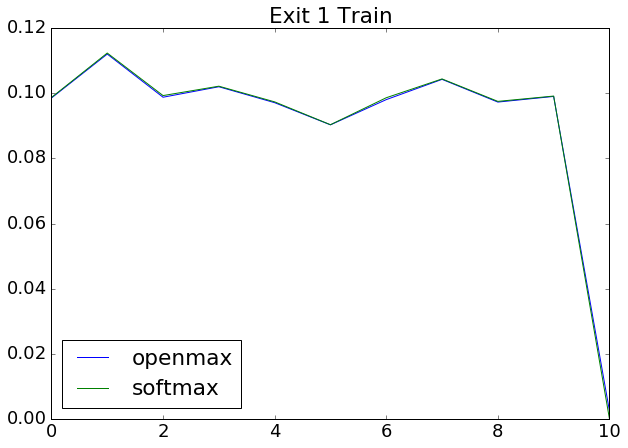

[ 0.09855546  0.11205391  0.09879397  0.10201218  0.0971187   0.09030928
  0.09805726  0.10428692  0.09730437  0.09903943  0.00246851]
[ 0.09871667  0.11236671  0.0993      0.10218335  0.09736667  0.09034998
  0.09863335  0.10441661  0.09751666  0.09915     0.        ]


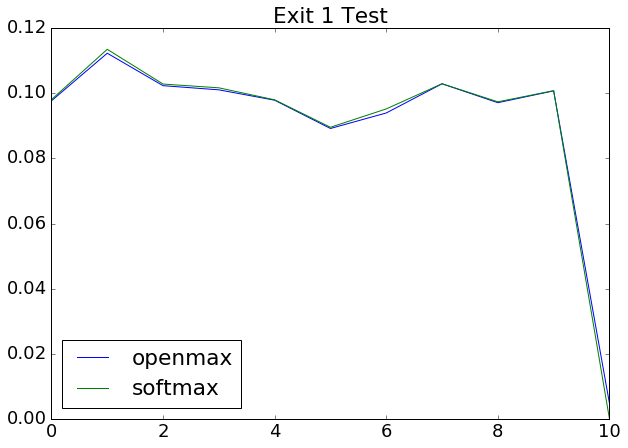

[ 0.09769277  0.11231546  0.10234177  0.10106387  0.09787914  0.08919127
  0.09395647  0.10292465  0.09711424  0.10075126  0.00476911]
[ 0.09807075  0.11351559  0.10284009  0.10168413  0.09799827  0.08956315
  0.09520143  0.10293968  0.09738286  0.10080405  0.        ]


In [325]:
branchyNet.testing()
branchyNet.to_cpu()

from openmax.openmax import OpenMax, get_openmax_scores, plot_openmax_mean

for i, model in enumerate(branchyNet.models):
    features_train = sp.expand_dims(model.test(x_train).data,1)
    features_test = sp.expand_dims(model.test(x_test).data,1)
    
    openmax = OpenMax()
    openmax.fit(features_train)

    openmax_vs_train, softmax_vs_train = get_openmax_scores(features_train, openmax)
    openmax_vs_test, softmax_vs_test = get_openmax_scores(features_test, openmax)
    
    plot_openmax_mean(openmax_vs_train, softmax_vs_train, title='Exit {} Train'.format(i))
    plot_openmax_mean(openmax_vs_test, softmax_vs_test, title='Exit {} Test'.format(i))